In [1]:
import math
import networkx as nx

In [2]:
G = nx.Graph()
G.add_node(1,contracted=False,imp=0,level=0,contr_neighbours=0)
G.add_node(2,contracted=False,imp=0,level=0,contr_neighbours=0)
G.add_node(3,contracted=False,imp=0,level=0,contr_neighbours=0)
G.add_node(4,contracted=False,imp=0,level=0,contr_neighbours=0)
G.add_node(5,contracted=False,imp=0,level=0,contr_neighbours=0)
G.add_node(6,contracted=False,imp=0,level=0,contr_neighbours=0)
G.add_node(7,contracted=False,imp=0,level=0,contr_neighbours=0)
G.add_node(8,contracted=False,imp=0,level=0,contr_neighbours=0)
G.add_node(9,contracted=False,imp=0,level=0,contr_neighbours=0)
G.add_node(10,contracted=False,imp=0,level=0,contr_neighbours=0)
G.add_node(11,contracted=False,imp=0,level=0,contr_neighbours=0)
G.add_node(12,contracted=False,imp=0,level=0,contr_neighbours=0)
G.add_node(13,contracted=False,imp=0,level=0,contr_neighbours=0)
G.add_node(14,contracted=False,imp=0,level=0,contr_neighbours=0)
edges = [
    (1,2,{'weight':1}),
    (1,3,{'weight':4}),
    (2,3,{'weight':5}),
    (2,4,{'weight':2}),
    (3,4,{'weight':2}),
    (3,7,{'weight':2}),
    (3,8,{'weight':1}),
    (3,9,{'weight':1}),
    (4,5,{'weight':5}),
    (5,10,{'weight':7}),
    (6,7,{'weight':4}),
    (6,8,{'weight':3}),
    (6,10,{'weight':3}),
    (6,5,{'weight':3}),
    (6,9,{'weight':1}),
    (7,8,{'weight':6}),
    (8,9,{'weight':3}),
    (8,13,{'weight':5}),
    (9,12,{'weight':1}),
    (9,10,{'weight':3}),
    (10,11,{'weight':4}),
    (11,12,{'weight':3}),
    (11,13,{'weight':4}),
    (12,13,{'weight':2}),
    (14,1,{'weight':3}),
    (14,13,{'weight':2})
]
G.add_edges_from([*edges])

In [3]:
nx.draw(G,with_labels=True)
edges_before = [*G.edges()]

In [4]:
G.nodes.data()

NodeDataView({1: {'contracted': False, 'imp': 0, 'level': 0, 'contr_neighbours': 0}, 2: {'contracted': False, 'imp': 0, 'level': 0, 'contr_neighbours': 0}, 3: {'contracted': False, 'imp': 0, 'level': 0, 'contr_neighbours': 0}, 4: {'contracted': False, 'imp': 0, 'level': 0, 'contr_neighbours': 0}, 5: {'contracted': False, 'imp': 0, 'level': 0, 'contr_neighbours': 0}, 6: {'contracted': False, 'imp': 0, 'level': 0, 'contr_neighbours': 0}, 7: {'contracted': False, 'imp': 0, 'level': 0, 'contr_neighbours': 0}, 8: {'contracted': False, 'imp': 0, 'level': 0, 'contr_neighbours': 0}, 9: {'contracted': False, 'imp': 0, 'level': 0, 'contr_neighbours': 0}, 10: {'contracted': False, 'imp': 0, 'level': 0, 'contr_neighbours': 0}, 11: {'contracted': False, 'imp': 0, 'level': 0, 'contr_neighbours': 0}, 12: {'contracted': False, 'imp': 0, 'level': 0, 'contr_neighbours': 0}, 13: {'contracted': False, 'imp': 0, 'level': 0, 'contr_neighbours': 0}, 14: {'contracted': False, 'imp': 0, 'level': 0, 'contr_neig

In [6]:

# importance priority queue
imp_pq = list()
order = 0

In [21]:

def SetOrder(G, imp_pq, n):
    # initialize imp_pq
    for i in range(n):
        imp_pq.append((-n,i+1))
    order = 1
    while len(imp_pq)>0:
        # find current lowest importance node in imp_pq
        curr_node_imp_pair = min(imp_pq, key= lambda pair:pair[0])
        curr_node  = curr_node_imp_pair[1]   
        imp_pq.remove(curr_node_imp_pair)
        # get new importance for current lowest importance node
        new_imp = GetImportance(G,curr_node)
        # lazy update
        if((len(imp_pq) == 0) or (new_imp - min(imp_pq,key=lambda pair:pair[0])[0]<= 10)):
            G.nodes[curr_node]['imp'] = order
            order +=1
            # contract node
            G.nodes[curr_node]['contracted'] = True
            ContractNode(G,curr_node,n)
            print("already contracted node %d"%curr_node)
        else:
            imp_pq.append((new_imp,curr_node))
            print("recalculated prority of node %d" %curr_node)

In [9]:
def GetImportance(G, x):
    # get number of incident edges of x
    edges_incident = len(G[x])
    # get number of added shortcut when simulate contracting node x
    shortcuts = 0
    seenBefore = list()
    for i in G[x]:
        for j in G[x]:
            pair = sorted((i,j))
            if (i==j or (pair in seenBefore)):continue
            seenBefore.append(pair)
            if((G.nodes[i]['contracted'] == False) and (G.nodes[j]['contracted'] == False)):
                shortcuts +=1
    edge_difference = shortcuts - edges_incident
    return edge_difference + 2*G.nodes[x]['contr_neighbours'] + G.nodes[x]['level']

In [10]:
def ContractNode(G, x, n):
    mx = GetMaxEdge(G, x)
    seenBefore = list()
    for i in G[x]:
        for j in G[x]:
            if ((G.nodes[i]['contracted'] == True) or (G.nodes[j]['contracted'])):
                continue
            pair = sorted((i,j))
            if (i==j or (pair in seenBefore)):continue
            seenBefore.append(pair)
            Check_Witness(G, n, i, x, mx)
    # update importance term in incident node
    for i in G[x]:
        G.nodes[i]['contr_neighbours'] +=1
        G.nodes[i]['level'] = max(G.nodes[i]['level'], G.nodes[x]['level'] + 1)
            
    

In [11]:
def GetMaxEdge(G, x):
    ret = 0
    for i in G[x]:
        for j in G[x]:
            if((i != j) and (G.nodes[i]['contracted'] == False) and (G.nodes[j]['contracted'] == False)):
                ret = max(ret, G[x][i]['weight'] + G[x][j]['weight'])
    return ret

In [12]:
def Check_Witness(G, n, u, x, mx, type=None):
    # dijkstra priority queue for search witness path from u to v, excludes x
    # v is incident edge of x, excludes u
    D_pq = list()
    # initialize D_pq
    D_pq.append((0, u))
    # distance dictionary from u to any node in search tree
    D_dist = dict()
    # initialize D_dist
    D_dist[u] = 0
    # maximum iteration round for dijkstra search
    iter = int(250 * (n - order) / n)
    while((len(D_pq) > 0) and (iter > 0)):
        iter -=1
        curr_dist_pair = min(D_pq, key= lambda pair:pair[0])
        curr_dist = curr_dist_pair[0]
        a = curr_dist_pair[1]
        D_pq.remove(curr_dist_pair)
        if(curr_dist > D_dist[a]):
            continue
        for p in G[a]:
            new_dist = curr_dist + G[a][p]['weight']
            # p must not be x and not be contracted
            if(p != x and (G.nodes[p]['contracted'] == False)):
                # p must not be settled node or distance greater than new_dist
                if((p not in D_dist) or (D_dist[p] > new_dist)):
                    # prune when witness path greater than mx
                    if(p not in D_dist):
                        if new_dist < mx:
                            D_dist[p] = new_dist
                            D_pq.append((new_dist,p))
                    else:
                        if(D_dist[p] < mx):
                            D_dist[p] = new_dist
                            D_pq.append((new_dist,p))
    for v in G[x]:
        # v can not be u and not be contracted
        if ((v!=u) and (G.nodes[v]['contracted'] == False)):
            new_w = G[u][x]['weight'] + G[x][v]['weight']
            # print("%d %d %d"%(u,v,new_w))
            if((v not in D_dist) or (D_dist[v] > new_w)):
                # add shortcut
                # try:
                #     if(u,v) in G.edges:
                #         print("run here: no more add_edge")
                #         continue
                # except:
                G.add_edge(u,v,weight=new_w)
                # print("run here: add_edge:%d %d"%(u,v))
            

In [13]:
def GetDistance(G, s, t):
    # search with bi-dijkstra with ordering rank
    # initializing dijkstra from source node s
    SP_s = dict()
    parent_s = dict()
    unrelaxed_s = list()
    for node in G.nodes():
        SP_s[node] = math.inf
        parent_s[node] = None
        unrelaxed_s.append(node)
    SP_s[s] = 0
    # dijkstra forward
    while unrelaxed_s:
        node = min(unrelaxed_s, key= lambda node:SP_s[node])
        unrelaxed_s.remove(node)
        if SP_s[node] == math.inf:
            break
        # G[node] are the incident edges of node
        for child in G[node]:
            # skip unqualified edges
            if G.nodes[child]['imp'] < G.nodes[node]['imp']:
                continue
            distance = SP_s[node] + G[node][child]['weight']
            # relax edge
            if distance < SP_s[child]:
                SP_s[child] = distance
                parent_s[child] = node
    # initializing dijkstra from target node t
    SP_t = dict()
    parent_t = dict()
    unrelaxed_t = list()
    for node in G.nodes():
        SP_t[node] = math.inf
        parent_t[node] = None
        unrelaxed_t.append(node)
    SP_t[t] = 0

    # dijkstra backward
    while unrelaxed_t:
        node = min(unrelaxed_t, key= lambda node: SP_t[node])
        unrelaxed_t.remove(node)
        if SP_t[node] == math.inf:
            break
        # G[node] are the incident edges of node
        for child in G[node]:
            # skip unqualified edges
            if G.nodes[child]['imp'] < G.nodes[node]['imp']:
                continue
            distance = SP_t[node] + G[node][child]['weight']
            if distance < SP_t[child]:
                SP_t[child] = distance
                parent_t[child] = node
    minimum = math.inf
    merge_node = None
    for i in SP_s:
        if SP_t[i] == math.inf:
            continue
        if SP_t[i] + SP_s[i] < minimum:
            minimum = SP_s[i] + SP_t[i]
            merge_node = i
    return minimum, merge_node, SP_s, SP_t, parent_s, parent_t

In [14]:
# see the route from origin of dijkstra to a given node
def Route_dijkstra(parent, node):
    route = []
    while node != None:
        route.append(node)
        node = parent[node]
    return route[::-1]

In [15]:
def See_full_route(G, s, t):
    minimum, merge_node, SP_s, SP_t, parent_s, parent_t = GetDistance(G, s, t)
    print("shortest distance:\n")
    print(minimum)
    route_from_target = Route_dijkstra(parent_t, merge_node)
    # show route
    print("route from target:\n")
    print(route_from_target)
    route_from_source = Route_dijkstra(parent_s, merge_node)
    # show route
    print("route from source:\n")
    print(route_from_source)
    route = route_from_source + route_from_target[::-1][1:]
    # show route
    print("entire route:\n")
    print(route)
    unvisited = 0
    for s_node, s_dist in SP_s.items():
        for t_node, t_dist in SP_t.items():
            if s_node == t_node and s_dist == t_dist == math.inf:
                unvisited += 1
    print(f"""we have skipped {unvisited} nodes from a graph with {len(G)}, 
    so we have skipped {unvisited/len(G)*100}% of the nodes in our search space.""")

In [22]:
SetOrder(G, imp_pq, len(G.nodes))

recalculated prority of node 1
recalculated prority of node 2
recalculated prority of node 3
recalculated prority of node 4
recalculated prority of node 5
recalculated prority of node 6
recalculated prority of node 7
recalculated prority of node 8
recalculated prority of node 9
recalculated prority of node 10
recalculated prority of node 11
recalculated prority of node 12
recalculated prority of node 13
already contracted node 14
already contracted node 12
already contracted node 5
already contracted node 10
already contracted node 4
already contracted node 7
already contracted node 11
already contracted node 1
already contracted node 2
already contracted node 6
already contracted node 8
already contracted node 3
recalculated prority of node 9
already contracted node 13
already contracted node 9


In [16]:
G.nodes.data()

NodeDataView({1: {'contracted': True, 'imp': 2, 'level': 10, 'contr_neighbours': 4}, 2: {'contracted': True, 'imp': 3, 'level': 10, 'contr_neighbours': 4}, 3: {'contracted': True, 'imp': 14, 'level': 9, 'contr_neighbours': 6}, 4: {'contracted': True, 'imp': 4, 'level': 10, 'contr_neighbours': 3}, 5: {'contracted': True, 'imp': 5, 'level': 7, 'contr_neighbours': 3}, 6: {'contracted': True, 'imp': 11, 'level': 9, 'contr_neighbours': 5}, 7: {'contracted': True, 'imp': 6, 'level': 10, 'contr_neighbours': 3}, 8: {'contracted': True, 'imp': 12, 'level': 10, 'contr_neighbours': 5}, 9: {'contracted': True, 'imp': 13, 'level': 10, 'contr_neighbours': 6}, 10: {'contracted': True, 'imp': 9, 'level': 9, 'contr_neighbours': 4}, 11: {'contracted': True, 'imp': 7, 'level': 6, 'contr_neighbours': 3}, 12: {'contracted': True, 'imp': 8, 'level': 9, 'contr_neighbours': 3}, 13: {'contracted': True, 'imp': 10, 'level': 9, 'contr_neighbours': 7}, 14: {'contracted': True, 'imp': 1, 'level': 4, 'contr_neighbo

In [17]:
edges_after = [*G.edges()]
print("# edges before", len(edges_before))
print("# edges after", len(edges_after))

# edges before 26
# edges after 29


In [18]:
added_edges = list(set(edges_after) - set(edges_before))
added_edges

[(1, 13), (2, 13), (9, 13)]

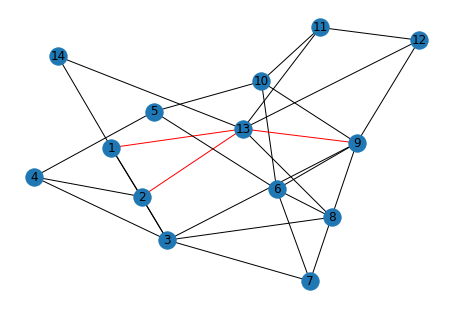

In [20]:
colors = ['r' if edge in added_edges else 'k' for edge in G.edges()] 
nx.draw(G, with_labels=True, edge_color=colors)

In [21]:
source = 13
destination = 10


In [22]:
See_full_route(G, source, destination)

shortest distance:

6
route from target:

[10, 9]
route from source:

[13, 9]
entire route:

[13, 9, 10]
we have skipped 8 nodes from a graph with 14, 
    so we have skipped 57.14285714285714% of the nodes in our search space.


In [23]:
from networkx.algorithms.shortest_paths.weighted import single_source_dijkstra
single_source_dijkstra(G, source, destination)

(6, [13, 9, 10])

In [29]:
for i in range(len(G.nodes)):
    print(i+1,G.nodes[i+1])

1 {'contracted': True, 'imp': 2, 'level': 10, 'contr_neighbours': 4}
2 {'contracted': True, 'imp': 3, 'level': 10, 'contr_neighbours': 4}
3 {'contracted': True, 'imp': 14, 'level': 9, 'contr_neighbours': 6}
4 {'contracted': True, 'imp': 4, 'level': 10, 'contr_neighbours': 3}
5 {'contracted': True, 'imp': 5, 'level': 7, 'contr_neighbours': 3}
6 {'contracted': True, 'imp': 11, 'level': 9, 'contr_neighbours': 5}
7 {'contracted': True, 'imp': 6, 'level': 10, 'contr_neighbours': 3}
8 {'contracted': True, 'imp': 12, 'level': 10, 'contr_neighbours': 5}
9 {'contracted': True, 'imp': 13, 'level': 10, 'contr_neighbours': 6}
10 {'contracted': True, 'imp': 9, 'level': 9, 'contr_neighbours': 4}
11 {'contracted': True, 'imp': 7, 'level': 6, 'contr_neighbours': 3}
12 {'contracted': True, 'imp': 8, 'level': 9, 'contr_neighbours': 3}
13 {'contracted': True, 'imp': 10, 'level': 9, 'contr_neighbours': 7}
14 {'contracted': True, 'imp': 1, 'level': 4, 'contr_neighbours': 2}
